# Impor pustaka yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Memuat Data

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d rishidamarla/costs-for-cancer-treatment

!unzip costs-for-cancer-treatment.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/rishidamarla/costs-for-cancer-treatment
License(s): CC0-1.0
  0% 0.00/21.6k [00:00<?, ?B/s]
100% 21.6k/21.6k [00:00<00:00, 44.7MB/s]
Archive:  costs-for-cancer-treatment.zip
  inflating: DowloadableDataFull_2011.01.12.csv  


# Memuat dataset dan eksplorasi awal

###Muat dataset

In [28]:
url = 'DowloadableDataFull_2011.01.12.csv'
data = pd.read_csv(url, skiprows=2)
data.columns = data.iloc[0]
data = data[1:]

###Ubah kolom menjadi numerik

In [29]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Total Costs'] = pd.to_numeric(data['Total Costs'], errors='coerce')


Tampilkan 5 baris pertama untuk inspeksi awal

In [30]:
print(data.head())

0 Cancer Site  Year         Sex       Age  \
1    AllSites  2010  Both sexes  All ages   
2    AllSites  2010  Both sexes  All ages   
3    AllSites  2010  Both sexes  All ages   
4    AllSites  2010  Both sexes  All ages   
5    AllSites  2010  Both sexes  All ages   

0                 Incidence and Survival Assumptions  \
1               Incidence, Survival at constant rate   
2  Incidence follows recent trend, Survival constant   
3  Survival follows recent trend, Incidence constant   
4           Incidence, Survival follow recent trends   
5           Incidence, Survival follow recent trends   

0 Annual Cost Increase (applied to initial and last phases)  Total Costs  \
1                                                 0%            124565.6   
2                                                 0%            122420.8   
3                                                 0%            125397.7   
4                                                 0%            123236.3   
5           

## Deskripsi Variabel

### Tampilkan nama kolom dan tipe data

In [31]:
print("Tipe Data dan Nilai Null:\n", data.info())
print("Statistik Ringkas:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 1 to 1254
Data columns (total 10 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Cancer Site                                                1254 non-null   object 
 1   Year                                                       1254 non-null   int64  
 2   Sex                                                        1254 non-null   object 
 3   Age                                                        1254 non-null   object 
 4   Incidence and Survival Assumptions                         1254 non-null   object 
 5   Annual Cost Increase (applied to initial and last phases)  1254 non-null   object 
 6   Total Costs                                                1254 non-null   float64
 7   Initial Year After Diagnosis Cost                          1254 non-null   object 
 8   Continui

###Memeriksa Missing Values

In [32]:
print("Pemeriksaan Missing Values:")
print(data.isnull().sum())

Pemeriksaan Missing Values:
0
Cancer Site                                                  0
Year                                                         0
Sex                                                          0
Age                                                          0
Incidence and Survival Assumptions                           0
Annual Cost Increase (applied to initial and last phases)    0
Total Costs                                                  0
Initial Year After Diagnosis Cost                            0
Continuing Phase Cost                                        0
Last Year of Life Cost                                       0
dtype: int64


###Memeriksa Duplicate Data

In [33]:
print("\nPemeriksaan Duplikat:")
print(f"Jumlah baris duplikat: {data.duplicated().sum()}")


Pemeriksaan Duplikat:
Jumlah baris duplikat: 0


###Plot diagram batang untuk 'Cancer Site'

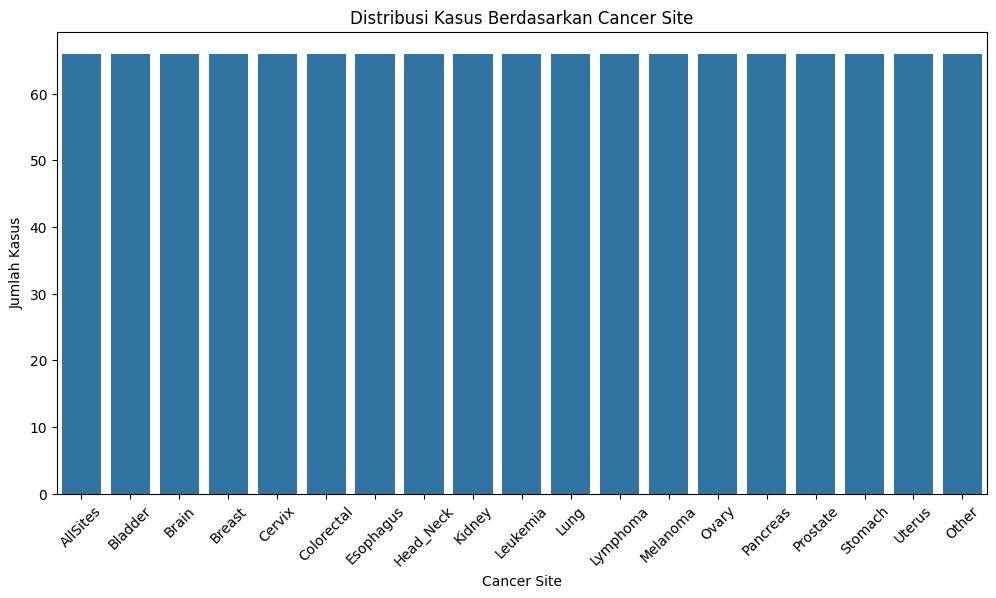

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Cancer Site', data=data)

plt.title('Distribusi Kasus Berdasarkan Cancer Site')
plt.xlabel('Cancer Site')
plt.ylabel('Jumlah Kasus')

plt.xticks(rotation=45)

plt.show()

###Diagram Batang untuk Total Costs berdasarkan Cancer Site

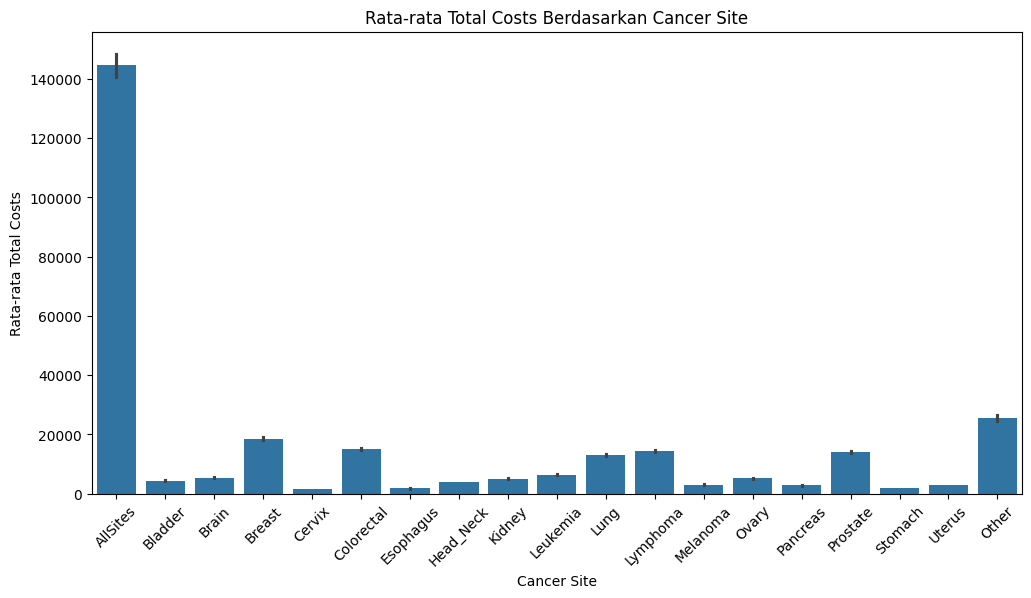

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancer Site', y='Total Costs', data=data, estimator='mean')

plt.title('Rata-rata Total Costs Berdasarkan Cancer Site')
plt.xlabel('Cancer Site')
plt.ylabel('Rata-rata Total Costs')

plt.xticks(rotation=45)

plt.show()

###diagram batang untuk Total Costs berdasarkan Cancer Site dan Sex

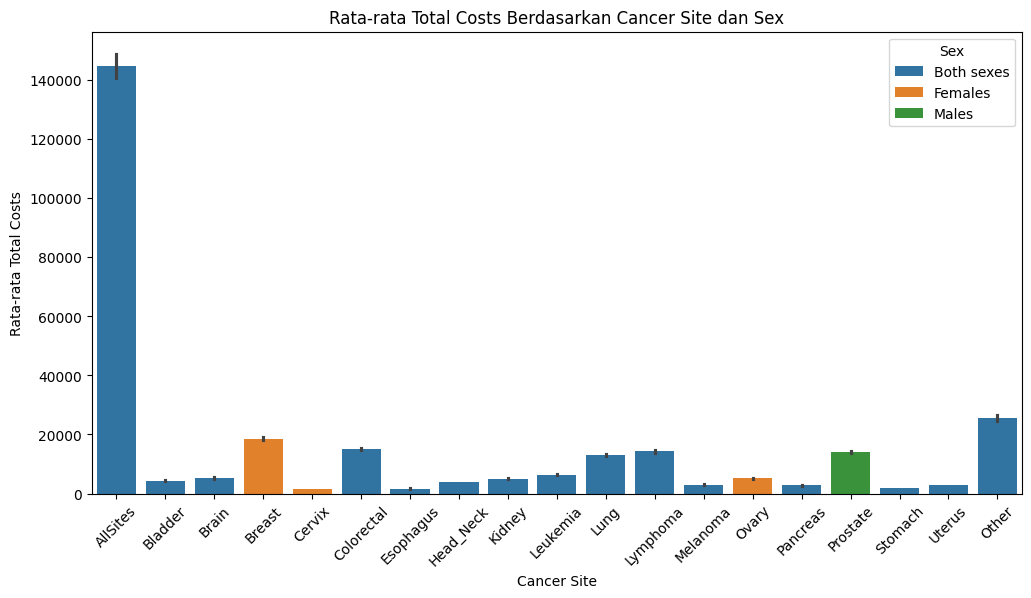

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cancer Site', y='Total Costs', hue='Sex', data=data)

plt.title('Rata-rata Total Costs Berdasarkan Cancer Site dan Sex')
plt.xlabel('Cancer Site')
plt.ylabel('Rata-rata Total Costs')

plt.xticks(rotation=45)

plt.show()

# Persiapan Data

###Menghapus simbol '%' pada kolom 'Annual Cost Increase' dan mengonversinya menjadi float

In [59]:
data['Annual Cost Increase (applied to initial and last phases)'] = (
    data['Annual Cost Increase (applied to initial and last phases)']
    .replace('%', '', regex=True)
    .astype(float) / 100
)

###One-Hot Encoding untuk kolom kategorikal

In [60]:
data_encoded = pd.get_dummies(data, columns=['Cancer Site', 'Sex', 'Age', 'Incidence and Survival Assumptions'], drop_first=True)


###Tampilkan 5 baris pertama untuk inspeksi awal

In [61]:
print(data.head())

0 Cancer Site  Year         Sex       Age  \
1    AllSites  2010  Both sexes  All ages   
2    AllSites  2010  Both sexes  All ages   
3    AllSites  2010  Both sexes  All ages   
4    AllSites  2010  Both sexes  All ages   
5    AllSites  2010  Both sexes  All ages   

0                 Incidence and Survival Assumptions  \
1               Incidence, Survival at constant rate   
2  Incidence follows recent trend, Survival constant   
3  Survival follows recent trend, Incidence constant   
4           Incidence, Survival follow recent trends   
5           Incidence, Survival follow recent trends   

0  Annual Cost Increase (applied to initial and last phases)  Total Costs  \
1                                             0.0000             124565.6   
2                                             0.0000             122420.8   
3                                             0.0000             125397.7   
4                                             0.0000             123236.3   
5      

###Tentukan fitur dan target

In [62]:
fitur = data_encoded.drop(columns=['Total Costs'])  # Gantilah dengan nama kolom target jika berbeda
target = data_encoded['Total Costs']

###Pisahkan data menjadi set pelatihan dan pengujian

In [63]:
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.2, random_state=42)

###Cek ukuran sampel

In [64]:
print("Jumlah sampel pelatihan:", len(X_train))
print("Jumlah sampel pengujian:", len(X_test))

Jumlah sampel pelatihan: 1003
Jumlah sampel pengujian: 251


###Standarisasi fitur

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Rata-rata X_train:", X_train.mean(axis=0))
print("Deviasi standar X_train:", X_train.std(axis=0))

Rata-rata X_train: [-1.30472790e-14 -6.46430954e-17  0.00000000e+00 -6.46430954e-17
  4.11767662e-17 -3.36498305e-17 -7.43838357e-17  5.75589205e-17
  7.08417483e-18 -2.47946119e-17 -7.08417483e-18 -6.02154861e-17
  6.02154861e-17 -1.77104371e-17  2.83366993e-17  1.06262622e-17
  3.09932649e-17 -8.50100980e-17  2.47946119e-17 -5.49023550e-17
 -2.74511775e-17 -8.14680106e-17  6.72996609e-17 -6.37575735e-17
 -2.74511775e-17  1.45225584e-16 -5.66733987e-17 -2.65656556e-17]
Deviasi standar X_train: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


# Pengembangan Model

###DataFrame untuk perbandingan model

In [66]:
hasil_model = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2'])

##Random Forest Regressor

###Tahap pertama dengan parameter default

In [67]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Tambahkan hasil Random Forest dengan parameter default ke dalam hasil_model

In [68]:
hasil_model = pd.concat([hasil_model, pd.DataFrame({'Model': ['Random Forest (default)'], 'MSE': [mse_rf], 'RMSE': [rmse_rf], 'R2': [r2_rf]})], ignore_index=True)


<ipython-input-68-c34ba99a4ef1>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hasil_model = pd.concat([hasil_model, pd.DataFrame({'Model': ['Random Forest (default)'], 'MSE': [mse_rf], 'RMSE': [rmse_rf], 'R2': [r2_rf]})], ignore_index=True)


## Linear Regression

In [69]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

###Tambahkan hasil Linear Regression ke dalam hasil_model

In [70]:
hasil_model = pd.concat([hasil_model, pd.DataFrame({'Model': ['Linear Regression'], 'MSE': [mse_lr], 'RMSE': [rmse_lr], 'R2': [r2_lr]})], ignore_index=True)


# Evaluasi Model

###Tampilkan hasil evaluasi model


Hasil Evaluasi Model:
                      Model            MSE        RMSE        R2
0  Random Forest (default)  469475.096036  685.182528  0.999227
1        Linear Regression       0.003453    0.058760  1.000000


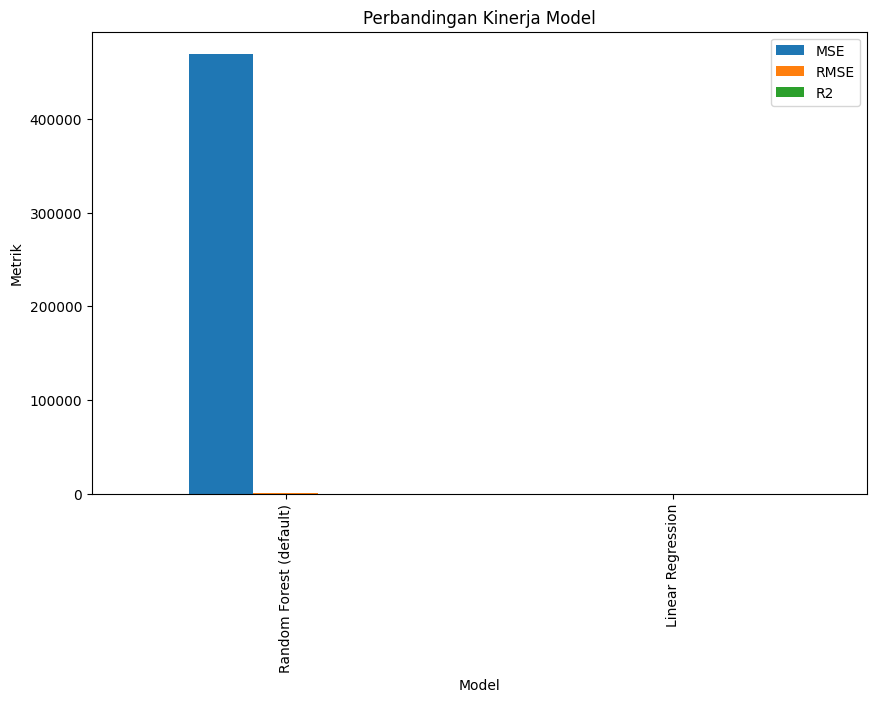

In [78]:
print("\nHasil Evaluasi Model:\n", hasil_model)

fig, ax = plt.subplots(figsize=(10, 6))
hasil_model.set_index('Model')[['MSE', 'RMSE', 'R2']].plot(kind='bar', ax=ax)
plt.title("Perbandingan Kinerja Model")
plt.ylabel("Metrik")
plt.show()

###Prediksi dan pengujian dengan model Linear Regression

In [79]:
y_pred_lr_test = lr_model.predict(X_test)


###Menghitung metrik evaluasi untuk Linear Regression pada data uji

In [80]:
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

In [81]:
print("Model Linear Regression - Evaluasi Set Pengujian")
print(f"MSE: {mse_lr_test:.2f}")
print(f"RMSE: {rmse_lr_test:.2f}")
print(f"R²: {r2_lr_test:.2f}")
print("\n")

Model Linear Regression - Evaluasi Set Pengujian
MSE: 0.00
RMSE: 0.06
R²: 1.00




###Prediksi dan pengujian dengan model Random Forest Regressor

In [82]:
y_pred_rf_test = rf_model.predict(X_test)

###Menghitung metrik evaluasi untuk Random Forest pada data uji

In [83]:
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_rf_test = np.sqrt(mse_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

In [84]:
print("Model Random Forest - Evaluasi Set Pengujian")
print(f"MSE: {mse_rf_test:.2f}")
print(f"RMSE: {rmse_rf_test:.2f}")
print(f"R²: {r2_rf_test:.2f}")

Model Random Forest - Evaluasi Set Pengujian
MSE: 469475.10
RMSE: 685.18
R²: 1.00
